(150, 150, 3)

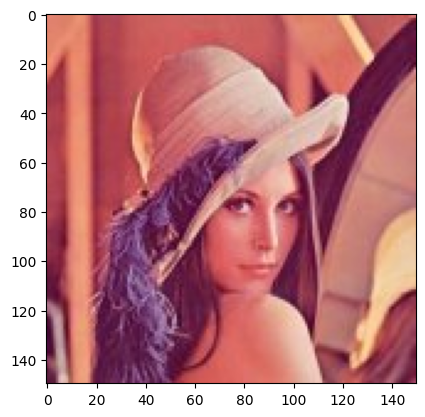

In [1]:
import time
from PIL import Image
import numpy as np
import cv2 
import matplotlib.pyplot as plt
from PIL import Image # Open & save 
import math
img = cv2.imread('Lenna.jpg')
#! sử dụng cvtColor để chuyển từ BGR sang RGB lại bằng tham COLOR_BGR2RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
#! thông tin của bức ảnh trên, w x h x c 
img.shape


<h1>Geometric transformations</h1>

<h3>Affine transform</h3>

Runtime is 0.0200498104095459 seconds.


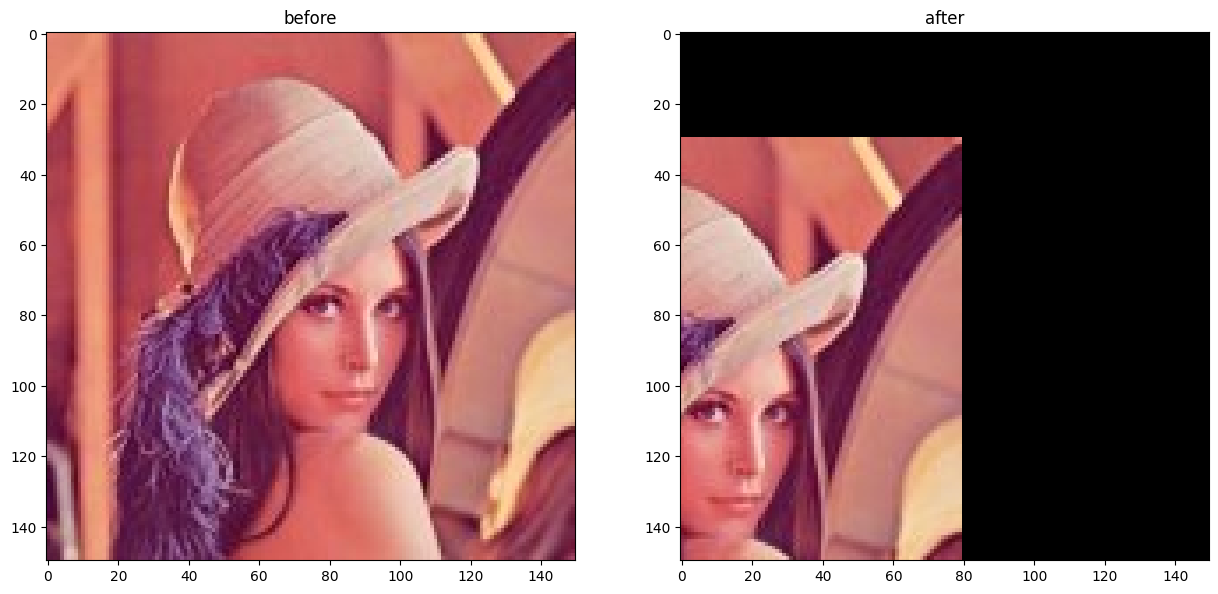

In [2]:

#! x' = x + tX
#! y' = y + tY
def Translate(img,tX,tY):
    newImage = np.uint8(np.zeros(img.shape))
    for x in range(150):
        for y in range(150):
            newx = x + tX
            newy = y + tY
            if newx in range(150) and newy in range(150):
                newImage[newx][newy] = img[x][y]
    return newImage


#! mở ảnh
img = cv2.imread("Lenna.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#! show ảnh gốc 
fig = plt.figure(figsize=(15,12))
ax1,ax2 = fig.subplots(1,2)
ax1.set_title("before")
ax1.imshow(img)

#! starting time
start = time.time()
#! gọi hàm biến đổi 
img = Translate(img,30,-70)
#! end time
end = time.time()

#! total time taken
print(f"Runtime is {end - start} seconds.")
#! show ảnh sau biến đổi
ax2.set_title("after")
ax2.imshow(img)


Old image shape : (150, 150, 3)
New image shape : (150, 75, 3)
Runtime is 0.03360176086425781 seconds.


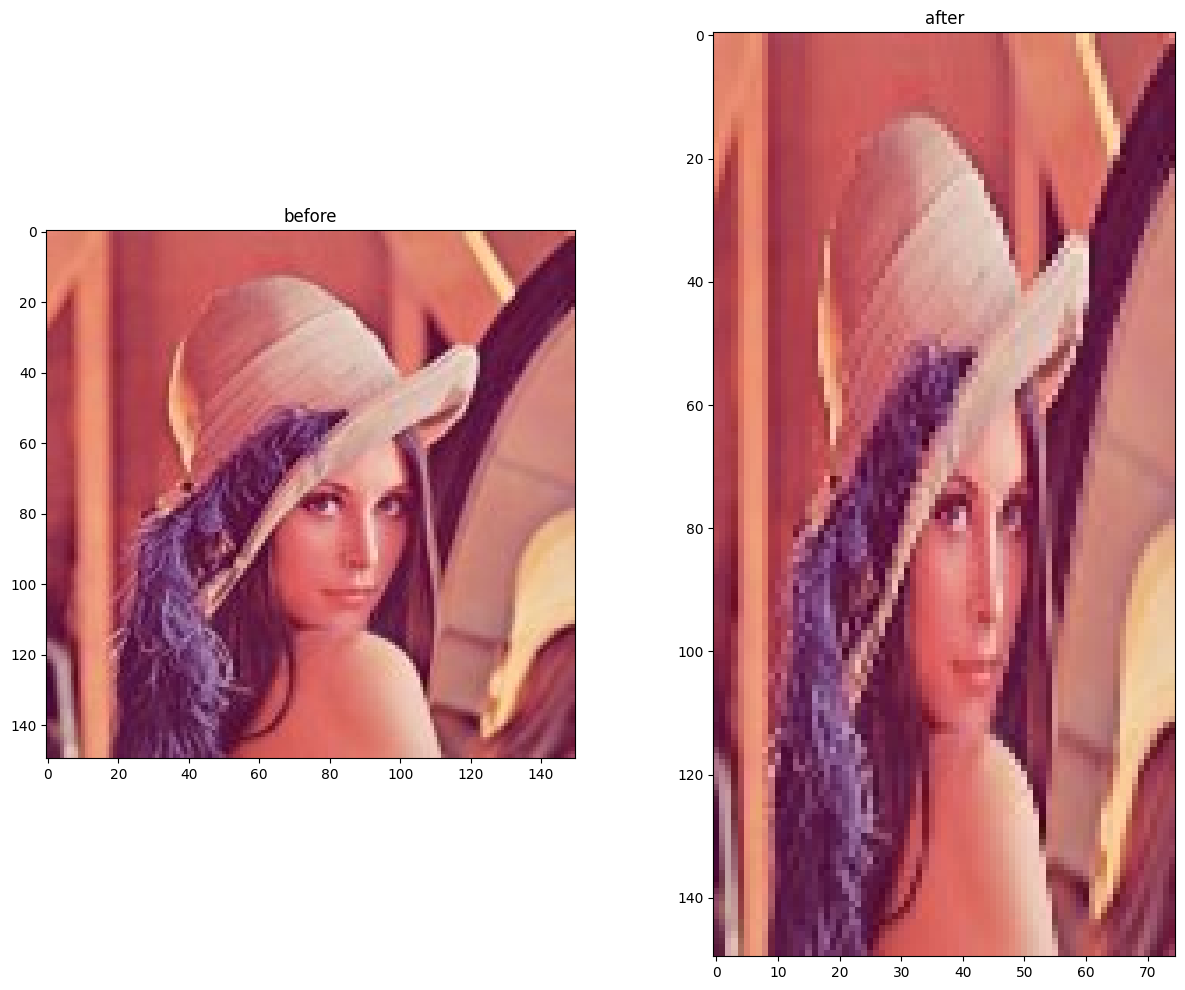

In [5]:

#! x' = x.sX
#! y' = y.sY
def Scale(img,sX,sY):
    width = int(img.shape[0] * sX)
    height = int(img.shape[1] * sY)
    newSize = (width, height,img.shape[2])
    newImage = np.uint8(np.zeros(newSize))
    print("Old image shape :",img.shape)
    for x in range(150):
        for y in range(150):
            newx = int(x*sX)
            newy = int(y*sY)
            if newx in range(width) and newy in range(height):
                newImage[newx][newy] = img[x][y]
    print("New image shape :",newImage.shape)
    return newImage.astype(np.uint8) # chuyển giá trị từ float thành int
#! mở ảnh
img = cv2.imread("Lenna.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#! show ảnh gốc 
fig = plt.figure(figsize=(15,12))
ax1,ax2 = fig.subplots(1,2)
ax1.set_title("before")
ax1.imshow(img)

#! starting time
start = time.time()
#! gọi hàm biến đổi 
img = Scale(img,1,0.5)
#! end time
end = time.time()

#! total time taken
print(f"Runtime is {end - start} seconds.")
#! show ảnh sau biến đổi
ax2.set_title("after")
ax2.imshow(img)


Old image shape : (150, 150, 3)
New image shape : (150, 150, 3)
Runtime is 0.03356671333312988 seconds.


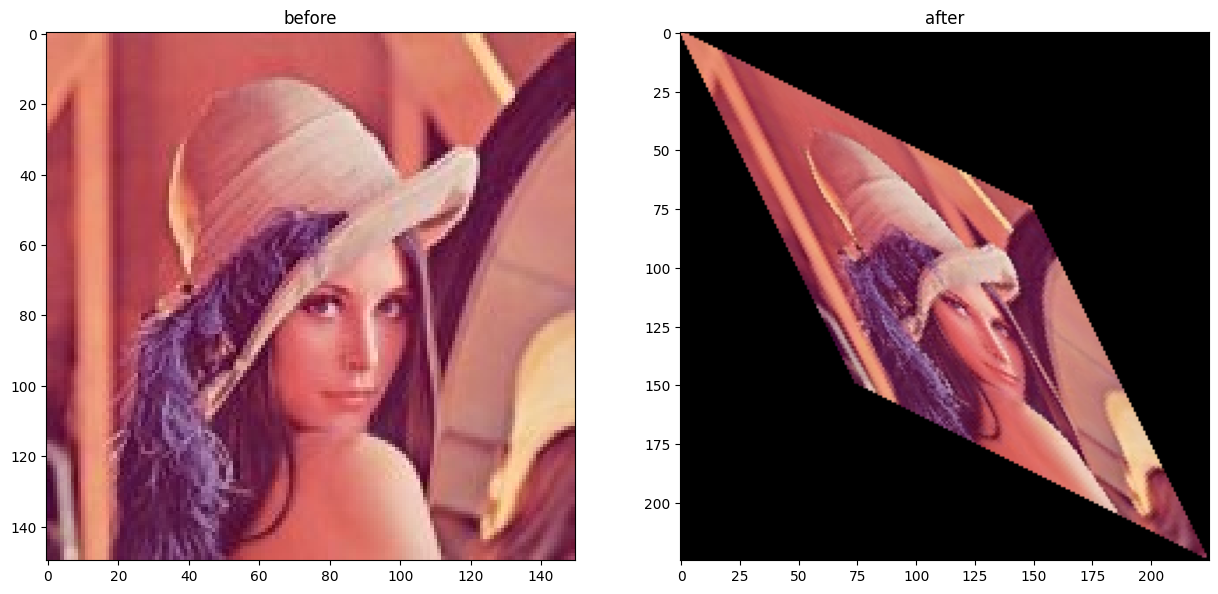

In [6]:

#! x' = x + a.y
#! y' = y + b.x
#! a = 0 => theo y, b = 0 => theo x
def Shear(img,a,b):
    width = int(img.shape[0] * (1+a))
    height = int(img.shape[1] * (1+b))
    newSize = (width, height,img.shape[2])
    print("Old image shape :",img.shape)
    newImage = np.uint8(np.zeros(newSize))
    for x in range(150):
        for y in range(150):
            newx = int(x + a*y)
            newy = int(y + b*x)
            if newx in range(width) and newy in range(height):
                newImage[newx][newy] = img[x][y]
    print("New image shape :",img.shape)
    return newImage.astype(np.uint8) # chuyển giá trị từ float thành int


#! mở ảnh
img = cv2.imread("Lenna.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#! show ảnh gốc 
fig = plt.figure(figsize=(15,12))
ax1,ax2 = fig.subplots(1,2)
ax1.set_title("before")
ax1.imshow(img)

#! starting time
start = time.time()
#! gọi hàm biến đổi 
img = Shear(img,0.5,0.5)
#! end time
end = time.time()

#! total time taken
print(f"Runtime is {end - start} seconds.")
#! show ảnh sau biến đổi
ax2.set_title("after")
ax2.imshow(img)


Runtime is 0.041411638259887695 seconds.


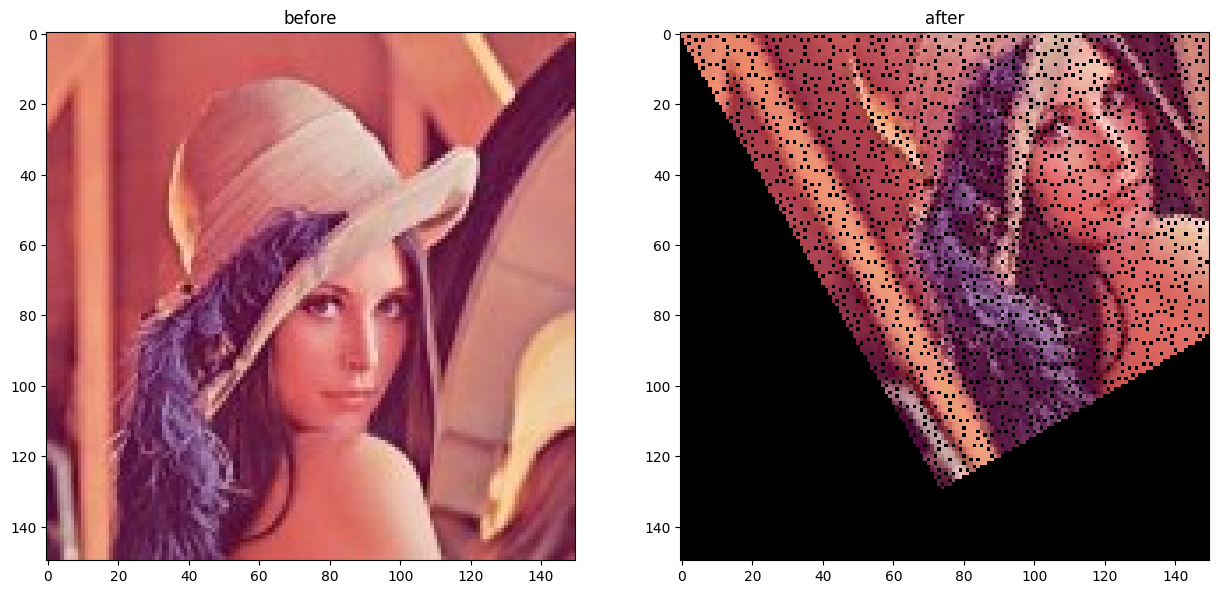

In [8]:

#! x’ = x.cosAlpha - y.sinAlpha
#! y’ = xsinAlpha + ycosAlpha
def Rotate(img,degree):
    rads = math.radians(degree)
    newImage = np.uint8(np.zeros(img.shape))
    for x in range(150):
        for y in range(150):
            newx = int(x*math.cos(rads) - y*math.sin(rads))
            newy = int(x*math.sin(rads) + y*math.cos(rads))
            if newx in range(150) and newy in range(150):
                newImage[newx][newy] = img[x][y]
    return newImage.astype(np.uint8) # chuyển giá trị từ float thành int

#! mở ảnh
img = cv2.imread("Lenna.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#! show ảnh gốc 
fig = plt.figure(figsize=(15,12))
ax1,ax2 = fig.subplots(1,2)
ax1.set_title("before")
ax1.imshow(img)

#! starting time
start = time.time()
#! gọi hàm biến đổi 
img = Rotate(img,30)
#! end time
end = time.time()

#! total time taken
print(f"Runtime is {end - start} seconds.")
#! show ảnh sau biến đổi
ax2.set_title("after")
ax2.imshow(img)


<h3>Brightness interpolation</h3>

Old image shape:  (150, 150, 3)
New image shape:  (300, 300, 3)
Runtime is 0.08452391624450684 seconds.


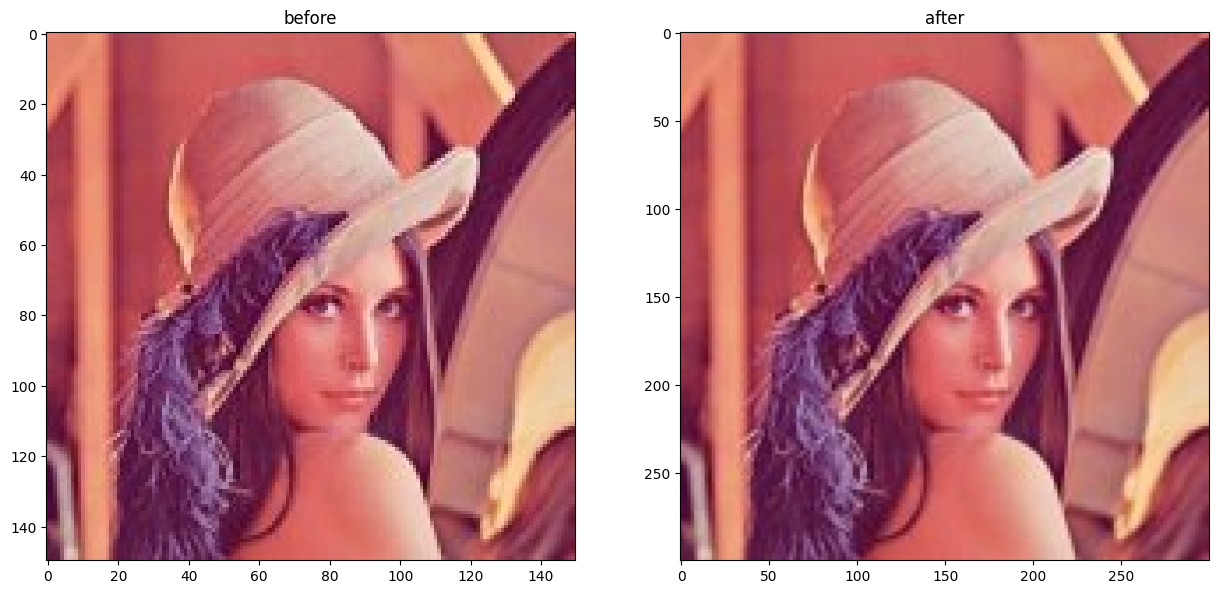

In [9]:

#!f '(x', y') = f (round(x),round( y))
def NearestInterpolation(img,scaleX,scaleY):
    print("Old image shape: ", img.shape)
    width = int(img.shape[0] * scaleX)
    height = int(img.shape[1] * scaleY)
    newSize = (width, height,img.shape[2])
    newImage = np.uint8(np.zeros(newSize))
    for x in range(newImage.shape[0]):
        for y in range(newImage.shape[1]):
            new_x = math.floor(x /scaleX)
            new_y = math.floor(y /scaleY)
            newImage[x][y] = img[new_x][new_y]
    print("New image shape: ", newImage.shape)
    return newImage.astype(np.uint8) # chuyển giá trị từ float thành int

#!scale = new_size/old_size

#! mở ảnh
img = cv2.imread("Lenna.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#! show ảnh gốc 
fig = plt.figure(figsize=(15,12))
ax1,ax2 = fig.subplots(1,2)
ax1.set_title("before")
ax1.imshow(img)

#! starting time
start = time.time()
#! gọi hàm biến đổi 
img = NearestInterpolation(img,2,2)
#! end time
end = time.time()

#! total time taken
print(f"Runtime is {end - start} seconds.")
#! show ảnh sau biến đổi
ax2.set_title("after")
ax2.imshow(img)


Old image shape:  (150, 150, 3)
New image shape:  (300, 300, 3)
Runtime is 2.031262159347534 seconds.


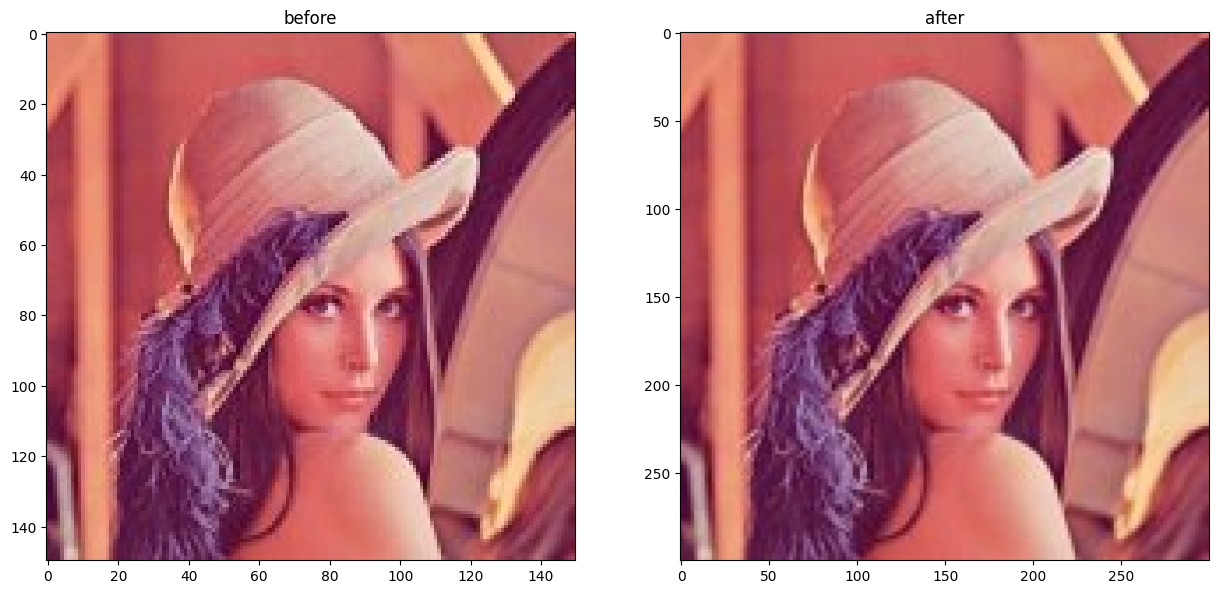

In [10]:

img = cv2.imread("Lenna.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#!f'(x', y') = (1-a)(1-b).f(l,k) + a(1-b)f(l+1,k) + b(1-a)f(l,k+1) + abf(l+1,k+1)
#!l = round(x),a = x - l; k = round(y),b = y - k
def LinearInterpolation(img,scaleX,scaleY):
    print("Old image shape: ", img.shape)
    width = int(img.shape[0] * scaleX)
    height = int(img.shape[1] * scaleY)
    newSize = (width, height,img.shape[2])
    newImage = np.uint8(np.zeros(newSize))
    for x in range(newImage.shape[0]):
        for y in range(newImage.shape[1]):
            l = math.floor(x / scaleX)
            if l+1 == 150:
                l = l-1
            a = math.floor(x/scaleX-l)
            k = math.floor(y / scaleY)
            if k+1 == 150:
                k = k-1
            b = math.floor(y/scaleY-k)
            
            newImage[x][y][0] =  int((1-a)*(1-b)*img[l][k][0] + a*(1-b)*img[l+1][k][0] + b*(1-a)*img[l][k+1][0] + a*b*img[l+1][k+1][0])
            newImage[x][y][1] =  int((1-a)*(1-b)*img[l][k][1] + a*(1-b)*img[l+1][k][1] + b*(1-a)*img[l][k+1][1] + a*b*img[l+1][k+1][1])
            newImage[x][y][2] =  int((1-a)*(1-b)*img[l][k][2] + a*(1-b)*img[l+1][k][2] + b*(1-a)*img[l][k+1][2] + a*b*img[l+1][k+1][2])
    print("New image shape: ", newImage.shape)
    return newImage.astype(np.uint8) # chuyển giá trị từ float thành int
      
#!scale = new_size/old_size

#! mở ảnh
img = cv2.imread("Lenna.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#! show ảnh gốc 
fig = plt.figure(figsize=(15,12))
ax1,ax2 = fig.subplots(1,2)
ax1.set_title("before")
ax1.imshow(img)

#! starting time
start = time.time()
#! gọi hàm biến đổi 
img = LinearInterpolation(img,2,2)
#! end time
end = time.time()

#! total time taken
print(f"Runtime is {end - start} seconds.")
#! show ảnh sau biến đổi
ax2.set_title("after")
ax2.imshow(img)
